In [2]:
import csv
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
dss = ['mnist', 'fashion_mnist', 'cifar10', 'cifar100', 'stl10']
colors = {'mnist':'b',
          'fashion_mnist': 'g',
          'cifar10': 'r',
          'cifar100': 'c',
          'stl10': 'm'}
ds_pretty_names = {'mnist':'MNIST',
                   'fashion_mnist': 'Fashion-MNIST',
                   'cifar10': 'CIFAR-10',
                   'cifar100': 'CIFAR-100',
                   'stl10': 'STL-10'}
num_epochs = 100 

fontsize = 25

epochs_header = ['epoch',
                 'accuracy',
                 'precision (micro)',
                 'precision (macro)',
                 'precision (weighted)',
                 'recall (micro)',
                 'recall (macro)',
                 'recall (weighted)',
                 'f1-measure (micro)',
                 'f1-measure (macro)',
                 'f1-measure (weighted)',
                 'loss',
                 'validation loss']
                 
meta_header   = ['model',
                 'num. layers',
                 'num. heads',
                 'stopped-at',
                 'n_segments',
                 'compactness',
                 'graph type',
                 'slic method',
                 'features',
                 'avg. num. of nodes',
                 'std. dev. of num. of nodes',
                 'avg. num. of edges',
                 'std. dev. of num. of edges',
                 'best epochs',
                 'last epochs',
                 'accuracy',
                 'precision micro',
                 'precision macro',
                 'precision weighted',
                 'recall micro',
                 'recall macro',
                 'recall weighted',
                 'micro',
                 'macro',
                 'weighted',
                 'avg. loss',
                 'training time',
                 'loading time']

# GCN tests

## Features

In [20]:
grey_dss = dss[0:2]
color_dss = dss[2:]
features_grey  = [['avg_color'],
                  ['avg_color','centroid'],
                  ['avg_color','centroid','std_deviation_color'],
                  ['avg_color','centroid','std_deviation_color','num_pixels'],
                  ['avg_color','centroid','std_deviation_color','std_deviation_centroid']]
features_color = [['avg_color'],
                  ['avg_color','centroid'],
                  ['avg_color','centroid','std_deviation_color'],
                  ['avg_color','centroid','std_deviation_color','num_pixels'],
                  ['avg_color','centroid','std_deviation_color','std_deviation_centroid'],
                  ['avg_color','centroid','std_deviation_color','std_deviation_centroid','avg_color_hsv'],
                  ['avg_color','centroid','std_deviation_color','std_deviation_centroid','avg_color_hsv','std_deviation_color_hsv']]
features_pretty = ['avg. color',
                  'avg. color + centroid', 
                  'avg. color + centroid + std. dev. color', 
                  'avg. color + centroid + std. dev. color \n + num. pixels', 
                  'avg. color + centroid + std. dev. color \n + std. dev. centroid', 
                  'avg. color + centroid + std. dev. color \n + std. dev. centroid + avg. color hsv',
                  'avg. color + centroid + std. dev. color \n + std. dev. centroid + avg. color hsv\n + std. dev. color hsv']

In [25]:
data_grey  = np.ndarray((len(grey_dss), len(features_grey), len(epochs_header), num_epochs), dtype=np.float64)
data_color = np.ndarray((len(color_dss), len(features_color), len(epochs_header), num_epochs), dtype=np.float64)

def load_data(datasets, features, data_arr):
    for dataset_index, dataset_name in enumerate(datasets):
        basedir = f'GCN/{dataset_name}/'
        for features_idx, features_list in enumerate(features):
            features_list.sort()
            filename = 'l3n75-RAG-SLIC0-{}.csv'.format('-'.join(features_list))
            with open(basedir + filename, newline='') as file:
                reader = csv.reader(file)
                for epoch_idx, epoch_info in enumerate(reader):
                    if epoch_idx > 0:
                        for v_idx, v in enumerate(epoch_info):
                            if v != '':
                                data_arr[dataset_index][features_idx][v_idx][epoch_idx - 1] = float(v)
                            else:
                                data_arr[dataset_index][features_idx][v_idx][epoch_idx - 1] = np.nan
        break

load_data(grey_dss, features_grey, data_grey)
# load_data(color_dss, features_color, data_color)

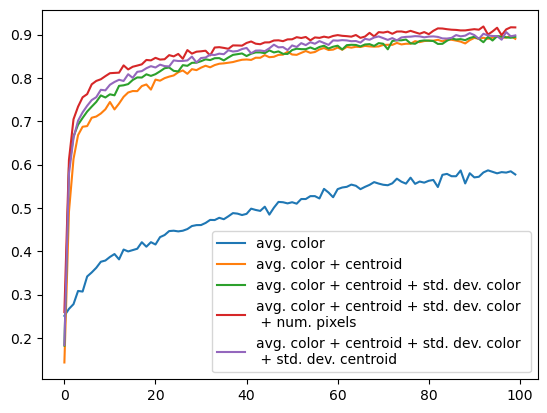

In [27]:
es = range(num_epochs)
for fi, fs in enumerate(features_grey):
    plt.plot(es, data_grey[0, fi, 9,:], label=features_pretty[fi])
plt.legend()
plt.show()

In [ ]:
epochs = range(100)

rows, cols = 2, 3
figsize = (29, 17)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
for dataset_index, dataset_name in enumerate(datasets_grey + datasets_color):
    axi, axj = int(np.floor(dataset_index/cols)),  int(dataset_index % cols)
    features = features_grey if dataset_index < len(datasets_grey) else features_color
    data = data_grey if dataset_index < len(datasets_grey) else data_color
    dataset_index_real = dataset_index if dataset_index < len(datasets_grey) else dataset_index - len(datasets_grey)
    ax[axi][axj].tick_params(labelsize=fs)
    for features_idx, features_name in enumerate(features):
        ax[axi][axj].set_xlabel('Epoch', fontsize=fs)
        ax[axi][axj].set_ylabel('F1-measure', fontsize=fs)
        ax[axi][axj].set_title(dataset_name, fontsize=fs)
        ax[axi][axj].plot(epochs, data[dataset_index_real][features_idx][9], label=features_name)
ax[rows-1][cols-1].remove()
handles, labels = ax[rows-1][cols-2].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1 - 0.09, 0.45), fontsize=fs)
plt.savefig('features-f1macro-2cols.png', bbox_inches='tight')
plt.show()